In [1]:
from __future__ import division
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = np.load("data.npy")
y = np.load("labels.npy")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

-1
(7899, 784)


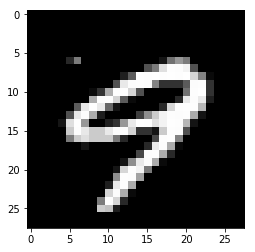

In [2]:
plt.imshow(X_train[-1].reshape(28,28),cmap="gray")
print(y_train[-1])
print(X_train.shape)

In [3]:
# Form SVM with L1 regularization problem.
n = 784
m = 7899
beta = Variable(n)
v = Variable()
loss = sum(pos(1 - multiply(y_train, X_train*beta + v)))
reg = norm(beta, 1)
lambd = Parameter(nonneg=True)
prob = Problem(Minimize(loss/m + lambd*reg))

In [4]:
beta_vals = []
lambd.value = 0.01
prob.solve()
params = beta.value

In [5]:
preds = []
for sample in X_test:
    preds.append(np.sign(np.sum(params*sample) + v.value)) 

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9355087358684481

In [7]:
print(np.max(params) - np.min(params))

1.080013359365816


In [8]:
count = 0
for i in range(len(params)):
    if(params[i] > 1e-2 or params[i] < -1e-2):
        count = count+1
print(count)

57
